In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_excel(r"C:\Users\singa\OneDrive\Desktop\ML\project\training_mathbert.xlsx")

# Feature columns and label
X = data.iloc[:, :-1]  # All columns except the last one are features
y = data['output']     # The last column is the target label

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
file_path = r"C:\Users\singa\OneDrive\Desktop\ML\project\training_mathbert.xlsx"
dataset = pd.read_excel(file_path)

# Define feature columns and target
features = dataset.drop(columns=['output'])
target = dataset['output']

# Convert the target variable to binary based on the threshold of 4
binary_target = np.where(target > 4, 1, 0)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, binary_target, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the training and test sets
train_predictions = knn.predict(X_train)
test_predictions = knn.predict(X_test)

# Evaluate the model
train_conf_matrix = confusion_matrix(y_train, train_predictions)
test_conf_matrix = confusion_matrix(y_test, test_predictions)

print("Training Confusion Matrix:\n", train_conf_matrix)
print("\nTest Confusion Matrix:\n", test_conf_matrix)

# Calculate and print other performance metrics
train_class_report = classification_report(y_train, train_predictions)
test_class_report = classification_report(y_test, test_predictions)

print("\nTraining Classification Report:\n", train_class_report)
print("\nTest Classification Report:\n", test_class_report)



Training Confusion Matrix:
 [[552  42]
 [ 77 117]]

Test Confusion Matrix:
 [[236  32]
 [ 34  36]]

Training Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       594
           1       0.74      0.60      0.66       194

    accuracy                           0.85       788
   macro avg       0.81      0.77      0.78       788
weighted avg       0.84      0.85      0.84       788


Test Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       268
           1       0.53      0.51      0.52        70

    accuracy                           0.80       338
   macro avg       0.70      0.70      0.70       338
weighted avg       0.80      0.80      0.80       338



In [25]:
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_excel(r"C:\Users\singa\OneDrive\Desktop\ML\project\training_mathbert.xlsx", sheet_name=0, usecols='A:E')

# Extract relevant columns
features = df.iloc[:, 1:4]  # Columns B, C, and D
target = df.iloc[:, 4]     # Column E

print("Dimensionality of the vector space:", df.shape)
print("Number of vectors:", df.shape[0])
print("Rank of matrix features:", np.linalg.matrix_rank(features))

# Calculate the pseudo-inverse of features matrix
features_inv = np.linalg.pinv(features)

# Compute the price of each item
item_prices = features_inv @ target
print("Price of each item:", item_prices)

# Predict target values
target_pred = features @ item_prices

# Calculate error metrics
MSE = np.square(np.subtract(target, target_pred)).mean()
RMSE = np.sqrt(MSE)
MAPE = np.mean(np.abs((target - target_pred) / target)) * 100
R2 = 1 - (np.square(target - target_pred).sum() / np.square(target - target.mean()).sum())

print("MSE:", MSE)
print("RMSE:", RMSE)
print("MAPE:", MAPE)
print("R2:", R2)


Dimensionality of the vector space: (1126, 5)
Number of vectors: 1126
Rank of matrix features: 3
Price of each item: [-0.51446426 -0.65659168 -1.19064923]
MSE: 0.0944957331863228
RMSE: 0.307401582927484
MAPE: 63.84935978574931
R2: -1.6437567559215447


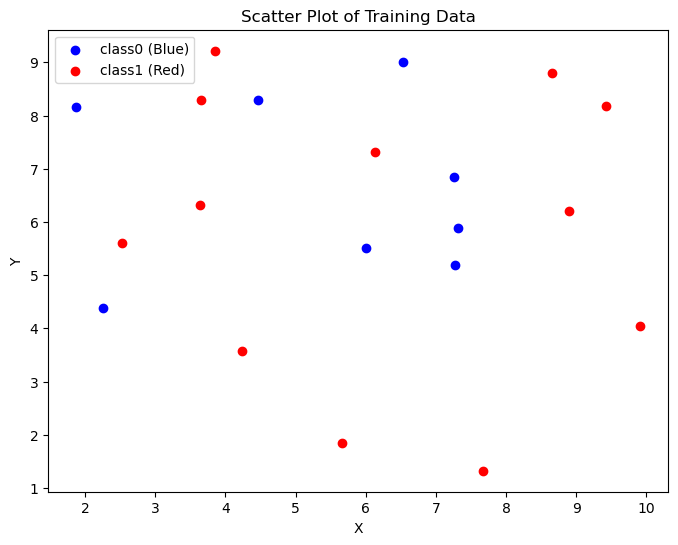

           X         Y   Class
0   3.650040  8.284250  class1
1   4.465880  8.291021  class0
2   8.660230  8.803651  class1
3   3.852298  9.219165  class1
4   2.525435  5.602082  class1
5   6.011211  5.513647  class0
6   9.425393  8.184657  class1
7   7.264268  6.849675  class0
8   6.130551  7.317702  class1
9   1.874588  8.162134  class0
10  6.535065  9.010048  class0
11  9.910485  4.041956  class1
12  2.260756  4.380247  class0
13  5.664967  1.845837  class1
14  8.896358  6.204521  class1
15  7.666918  1.323480  class1
16  7.273142  5.190382  class0
17  7.322357  5.883802  class0
18  4.235420  3.578871  class1
19  3.642327  6.317499  class1


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate 20 random data points for x_coords and y_coords, with values ranging between 1 and 10
x_coords = np.random.uniform(1, 10, 20)
y_coords = np.random.uniform(1, 10, 20)

# Assign these points to two different classes randomly
labels = np.random.choice(['class0', 'class1'], size=20)

# Create a DataFrame with x_coords, y_coords, and Class columns
df_data = pd.DataFrame({'X': x_coords, 'Y': y_coords, 'Class': labels})

# Separate the points based on their class
x_class0 = df_data[df_data['Class'] == 'class0']['X']
y_class0 = df_data[df_data['Class'] == 'class0']['Y']
x_class1 = df_data[df_data['Class'] == 'class1']['X']
y_class1 = df_data[df_data['Class'] == 'class1']['Y']

# Create a scatter plot of the data points
plt.figure(figsize=(8, 6))
plt.scatter(x_class0, y_class0, c='blue', label='class0 (Blue)')
plt.scatter(x_class1, y_class1, c='red', label='class1 (Red)')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Training Data')

plt.legend(loc='best')

plt.show()

# Display the DataFrame
print(df_data)


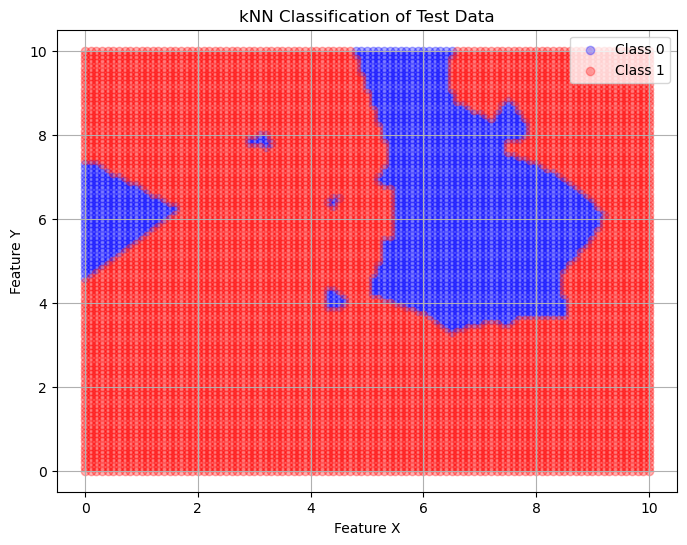

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Generate grid for test data
x_range = np.arange(0, 10.1, 0.1)
y_range = np.arange(0, 10.1, 0.1)
x_grid, y_grid = np.meshgrid(x_range, y_range)
test_features = pd.DataFrame({'X': x_grid.ravel(), 'Y': y_grid.ravel()})

# Initialize and train kNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(df_data[['X', 'Y']], df_data['Class'])

# Predict class for the test data
test_features['Class'] = knn_classifier.predict(test_features[['X', 'Y']])

# Plot the classification results
plt.figure(figsize=(8, 6))
plt.scatter(test_features['X'][test_features['Class'] == 'class0'], test_features['Y'][test_features['Class'] == 'class0'], color='blue', label='Class 0', alpha=0.3)
plt.scatter(test_features['X'][test_features['Class'] == 'class1'], test_features['Y'][test_features['Class'] == 'class1'], color='red', label='Class 1', alpha=0.3)

plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('kNN Classification of Test Data')
plt.legend()
plt.grid(True)

plt.show()


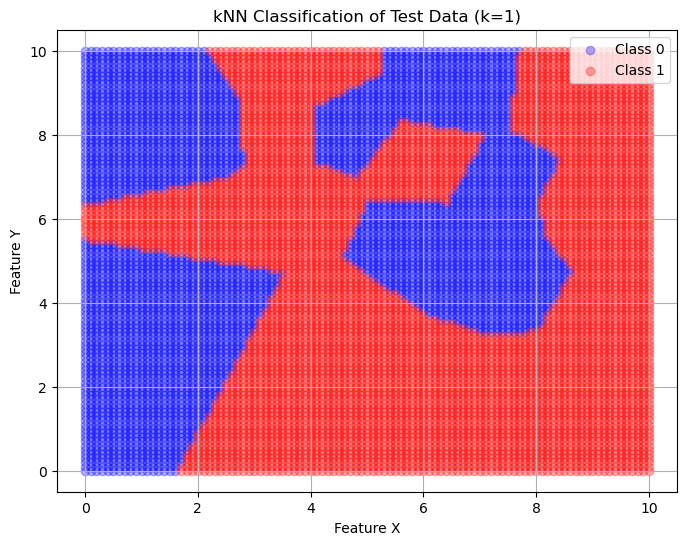

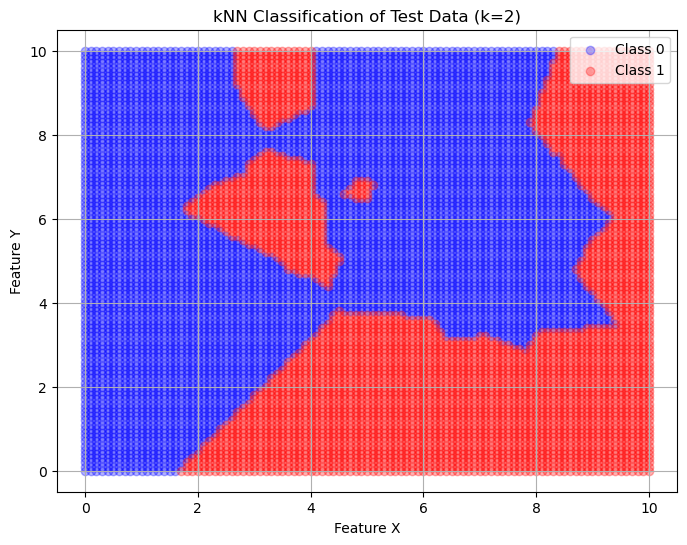

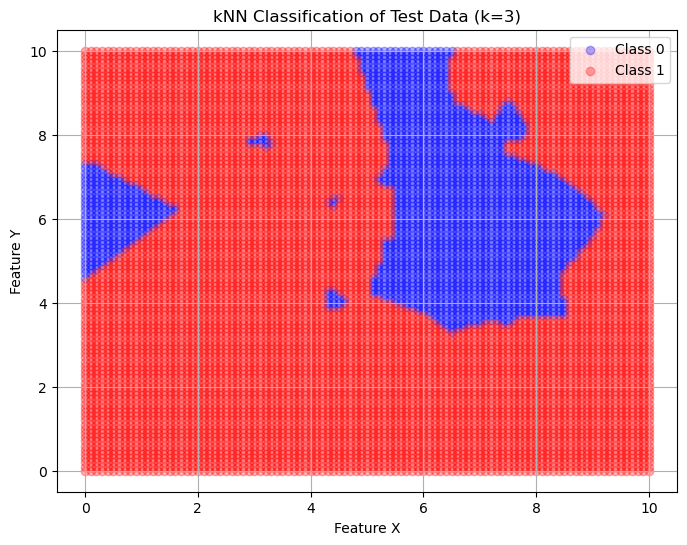

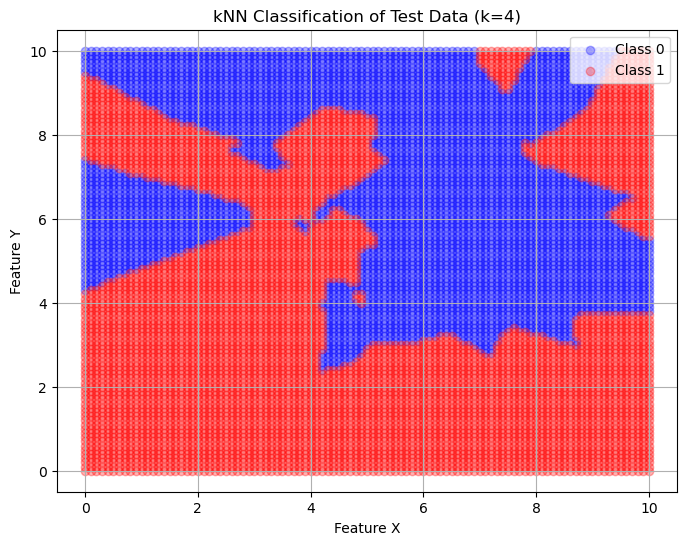

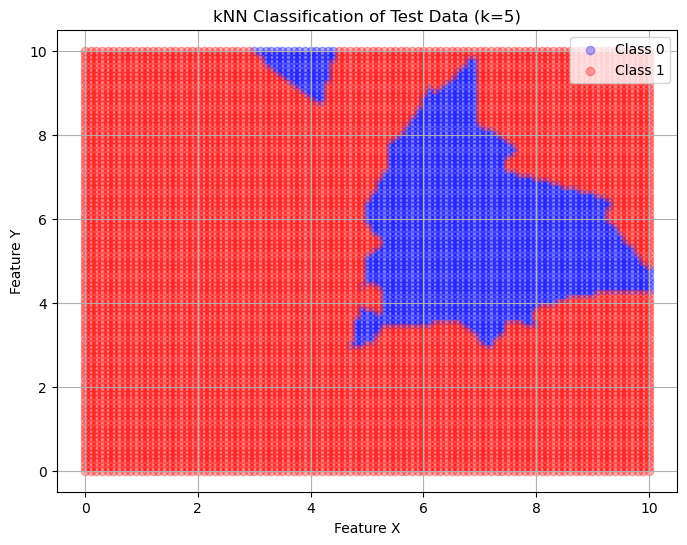

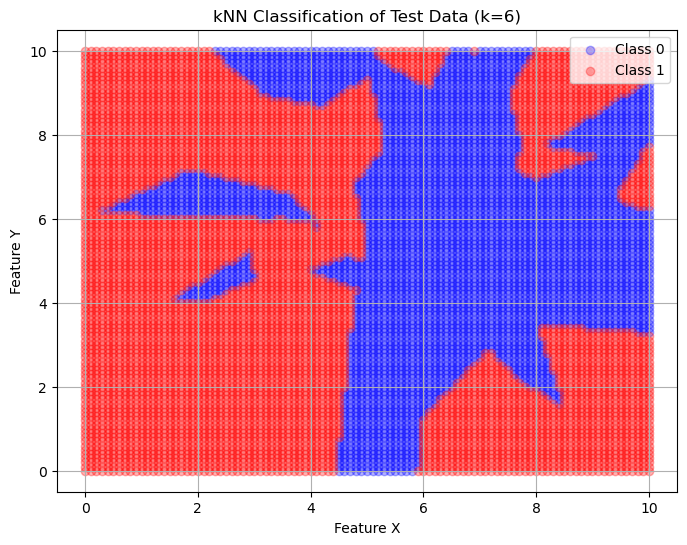

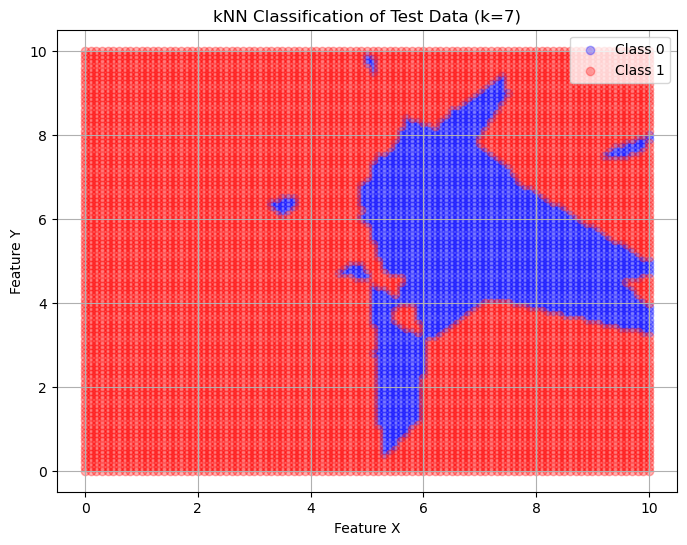

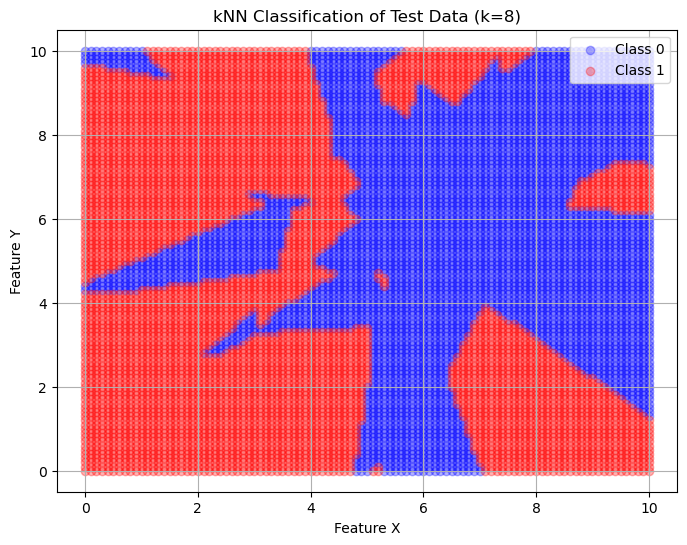

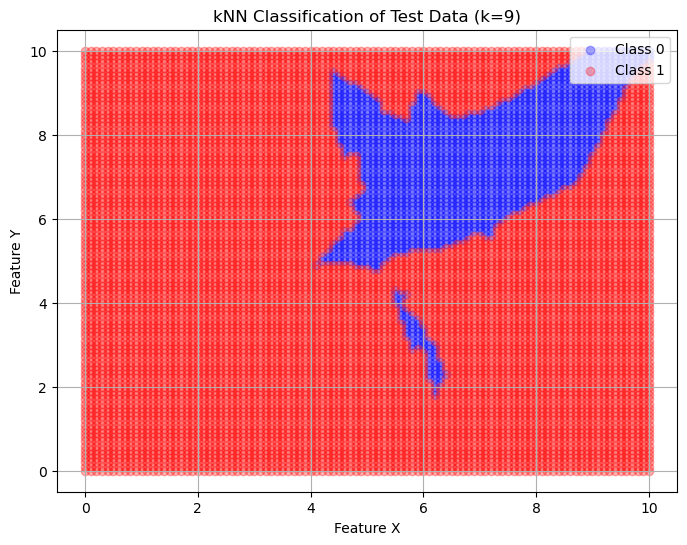

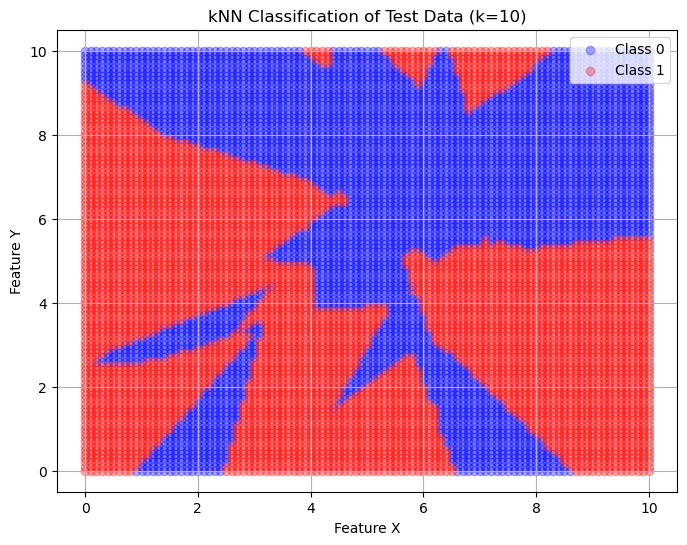

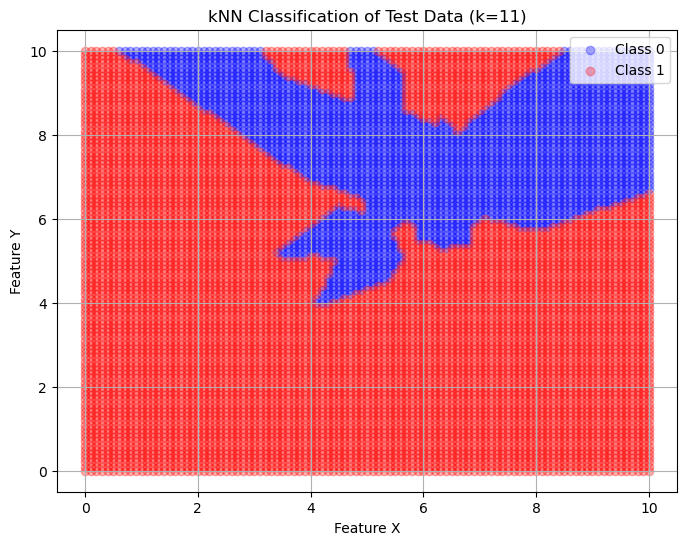

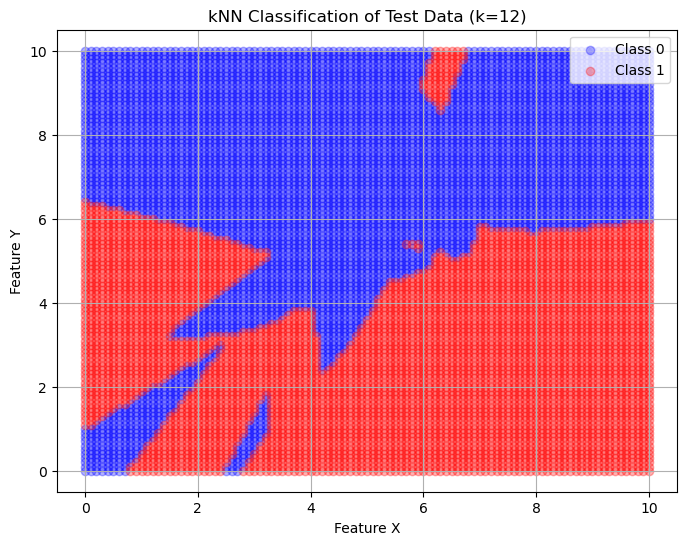

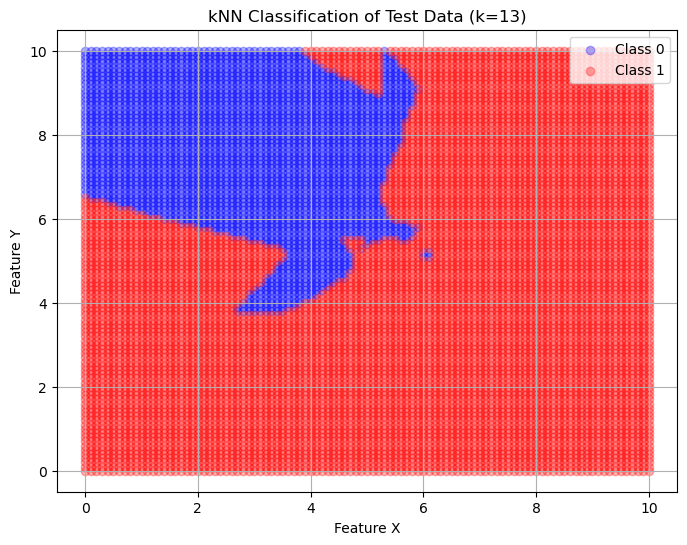

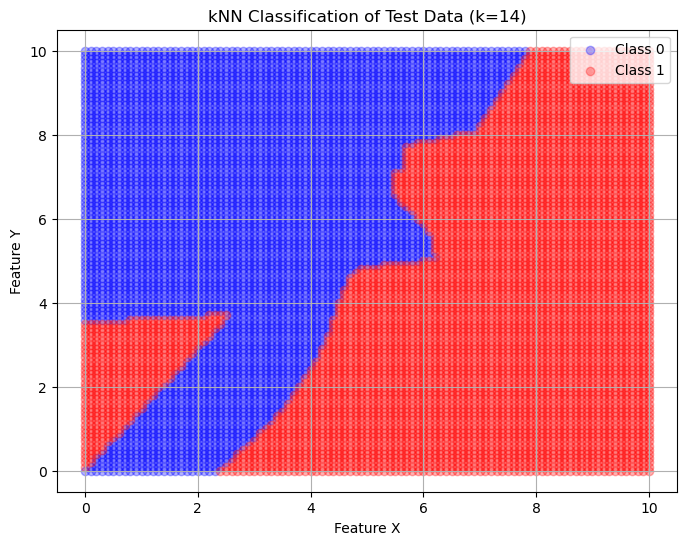

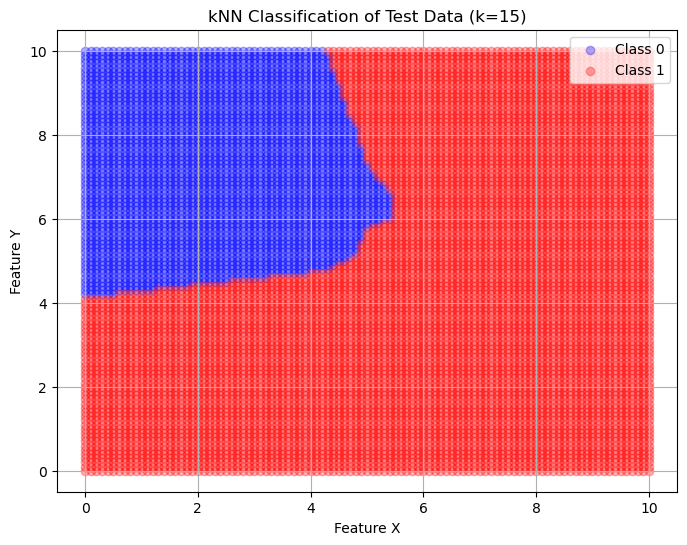

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Generate grid for test data
x_values = np.arange(0, 10.1, 0.1)
y_values = np.arange(0, 10.1, 0.1)
x_grid, y_grid = np.meshgrid(x_values, y_values)
test_df = pd.DataFrame({'X': x_grid.ravel(), 'Y': y_grid.ravel()})

# Iterate over different values of k for k-NN
for num_neighbors in range(1, 16):
    knn_model = KNeighborsClassifier(n_neighbors=num_neighbors)
    knn_model.fit(df_data[['X', 'Y']], df_data['Class'])

    # Predict class for the test data
    test_df['Class'] = knn_model.predict(test_df[['X', 'Y']])

    # Plot the classification results
    plt.figure(figsize=(8, 6))
    plt.scatter(test_df['X'][test_df['Class'] == 'class0'], test_df['Y'][test_df['Class'] == 'class0'], color='blue', label='Class 0', alpha=0.3)
    plt.scatter(test_df['X'][test_df['Class'] == 'class1'], test_df['Y'][test_df['Class'] == 'class1'], color='red', label='Class 1', alpha=0.3)

    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title(f'kNN Classification of Test Data (k={num_neighbors})')
    plt.legend()
    plt.grid(True)

    plt.show()


Best k value: 4
Best cross-validation accuracy: 0.5000


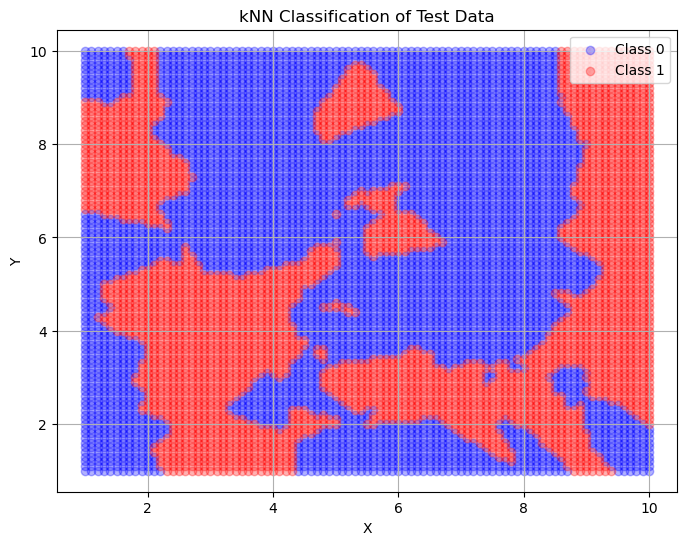

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Generate synthetic data
np.random.seed(42)  # For reproducibility
x_values = np.random.uniform(1, 10, 100)
y_values = np.random.uniform(1, 10, 100)
class_labels = np.random.choice(['class0', 'class1'], size=100)

# Create DataFrame
data_df = pd.DataFrame({'X': x_values, 'Y': y_values, 'Class': class_labels})

# Convert class labels to binary output (1 for 'class1', 0 for 'class0')
data_df['BinaryClass'] = data_df['Class'].apply(lambda x: 1 if x == 'class1' else 0)

# Select features and target
features = data_df[['X', 'Y']]
target = data_df['BinaryClass']

# Generate test data with values of X & Y varying between 1 and 10 with increments of 0.1
x_test_values = np.arange(1, 10.1, 0.1)
y_test_values = np.arange(1, 10.1, 0.1)
x_test_grid, y_test_grid = np.meshgrid(x_test_values, y_test_values)
test_df = pd.DataFrame({
    'X': x_test_grid.ravel(),
    'Y': y_test_grid.ravel()
})

# Train the kNN classifier with GridSearchCV
param_grid = {'n_neighbors': range(1, 8)}
knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(features, target)

# Output the best k value and the best cross-validation accuracy
print(f"Best k value: {grid_search.best_params_['n_neighbors']}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Train the classifier with the best k value
best_k = grid_search.best_params_['n_neighbors']
best_knn_model = KNeighborsClassifier(n_neighbors=best_k)
best_knn_model.fit(features, target)

# Classify the test data
test_df['PredictedClass'] = best_knn_model.predict(test_df[['X', 'Y']])

# Plotting the test data output with test points colored as per their predicted class
plt.figure(figsize=(8, 6))
plt.scatter(test_df['X'][test_df['PredictedClass'] == 0],
            test_df['Y'][test_df['PredictedClass'] == 0],
            color='blue', label='Class 0', alpha=0.3)
plt.scatter(test_df['X'][test_df['PredictedClass'] == 1],
            test_df['Y'][test_df['PredictedClass'] == 1],
            color='red', label='Class 1', alpha=0.3)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('kNN Classification of Test Data')
plt.legend()
plt.grid(True)
plt.show()


Best k value: 4
Best cross-validation accuracy: 0.5000


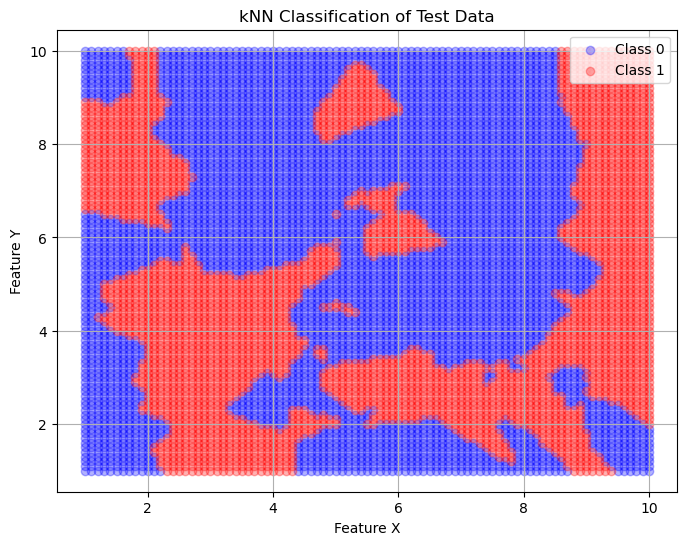

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Generate synthetic data
np.random.seed(42)  # For reproducibility
x_coords = np.random.uniform(1, 10, 100)
y_coords = np.random.uniform(1, 10, 100)
class_labels = np.random.choice(['class0', 'class1'], size=100)

# Create DataFrame
data_df = pd.DataFrame({'feature_x': x_coords, 'feature_y': y_coords, 'Class': class_labels})

# Convert class labels to binary output (1 for 'class1', 0 for 'class0')
data_df['binary_output'] = data_df['Class'].apply(lambda x: 1 if x == 'class1' else 0)

# Select features and target
features = data_df[['feature_x', 'feature_y']]
target = data_df['binary_output']

# Generate test data with values of feature_x & feature_y varying between 1 and 10 with increments of 0.1
x_test_range = np.arange(1, 10.1, 0.1)
y_test_range = np.arange(1, 10.1, 0.1)
x_test_grid, y_test_grid = np.meshgrid(x_test_range, y_test_range)
test_df = pd.DataFrame({
    'feature_x': x_test_grid.ravel(),
    'feature_y': y_test_grid.ravel()
})

# Train the kNN classifier with GridSearchCV
param_grid = {'n_neighbors': range(1, 8)}
knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(features, target)

# Output the best k value and the best cross-validation accuracy
print(f"Best k value: {grid_search.best_params_['n_neighbors']}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Train the classifier with the best k value
best_k = grid_search.best_params_['n_neighbors']
best_knn_model = KNeighborsClassifier(n_neighbors=best_k)
best_knn_model.fit(features, target)

# Classify the test data
test_df['PredictedClass'] = best_knn_model.predict(test_df[['feature_x', 'feature_y']])

# Plotting the test data output with test points colored as per their predicted class
plt.figure(figsize=(8, 6))
plt.scatter(test_df['feature_x'][test_df['PredictedClass'] == 0],
            test_df['feature_y'][test_df['PredictedClass'] == 0],
            color='blue', label='Class 0', alpha=0.3)
plt.scatter(test_df['feature_x'][test_df['PredictedClass'] == 1],
            test_df['feature_y'][test_df['PredictedClass'] == 1],
            color='red', label='Class 1', alpha=0.3)

plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('kNN Classification of Test Data')
plt.legend()
plt.grid(True)
plt.show()
